# 1.Import Packages and Data File

In [81]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [82]:
# import data files
import kagglehub

path = kagglehub.dataset_download("prasad22/healthcare-dataset")

csv_file_path = os.path.join(path, "healthcare_dataset.csv")

df = pd.read_csv(csv_file_path)

In [83]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# 2.Data Preprocessing

In [84]:
# Check Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [85]:
# Check null value
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [86]:
# Check duplicates
df.duplicated().sum()

534

In [87]:
# Double confirm the duplicates
columns_to_check = ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition','Date of Admission', 'Hospital', 'Room Number']
for i in range(1, len(columns_to_check) + 1):
    subset_columns = columns_to_check[:i]
    print(f"Checking subset: {subset_columns}")
    print("Duplicates:", df.duplicated(subset=subset_columns).sum())

Checking subset: ['Name']
Duplicates: 5508
Checking subset: ['Name', 'Age']
Duplicates: 534
Checking subset: ['Name', 'Age', 'Gender']
Duplicates: 534
Checking subset: ['Name', 'Age', 'Gender', 'Blood Type']
Duplicates: 534
Checking subset: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition']
Duplicates: 534
Checking subset: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission']
Duplicates: 534
Checking subset: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Hospital']
Duplicates: 534
Checking subset: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Hospital', 'Room Number']
Duplicates: 534


In [88]:
# Remove duplicates
df2 = df.drop_duplicates()

In [89]:
# Check new df
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


Summary
1. The Dataset is composed 55500 records, with 534 duplicates, upon removal, the dataset is now with 54966 unique records.
2. No null value is found in the dataset.

# 3.Data Exploration

In [90]:
# Change Date of admission and discharge date to Datetime format
df2['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df2['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

<ipython-input-90-016c00e805c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
<ipython-input-90-016c00e805c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


In [91]:
# Add a column "Hospitalization Time"
df2['Hospitalization time'] = df2['Discharge Date'] - df2['Date of Admission']
df2['Hospitalization time in days'] = df2['Hospitalization time'].dt.total_seconds() / (24 * 3600)

<ipython-input-91-5fb975061094>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hospitalization time'] = df2['Discharge Date'] - df2['Date of Admission']
<ipython-input-91-5fb975061094>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hospitalization time in days'] = df2['Hospitalization time'].dt.total_seconds() / (24 * 3600)


In [92]:
# Check distribution of dataset
df2.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Hospitalization time,Hospitalization time in days
count,54966.000000,54966,54966.000000,54966.000000,54966,54966,54966.000000
mean,51.535185,2021-11-01 17:35:29.505512448,25544.306284,301.124404,2021-11-17 05:34:28.202161408,15 days 11:58:58.696648837,15.499290
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00,1 days 00:00:00,1.000000
25%,35.000000,2020-07-28 00:00:00,13243.718641,202.000000,2020-08-13 00:00:00,8 days 00:00:00,8.000000
50%,52.000000,2021-11-02 00:00:00,25542.749145,302.000000,2021-11-18 00:00:00,15 days 00:00:00,15.000000
75%,68.000000,2023-02-03 00:00:00,37819.858159,401.000000,2023-02-19 00:00:00,23 days 00:00:00,23.000000
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00,30 days 00:00:00,30.000000
std,19.605661,NaN,14208.409711,115.223143,NaN,8 days 15:52:31.077750120,8.661471


In [93]:
# Check distribution of dataset (non-numerical)
df2.describe(include= "object").T

,count,unique,top,freq
Name,54966,49992,DAvId muNoZ,3
Gender,54966,2,Male,27496
Blood Type,54966,8,A-,6898
Medical Condition,54966,6,Arthritis,9218
Doctor,54966,40341,Michael Smith,27
Hospital,54966,39876,LLC Smith,44
Insurance Provider,54966,5,Cigna,11139
Admission Type,54966,3,Elective,18473
Medication,54966,5,Lipitor,11038
Test Results,54966,3,Abnormal,18437


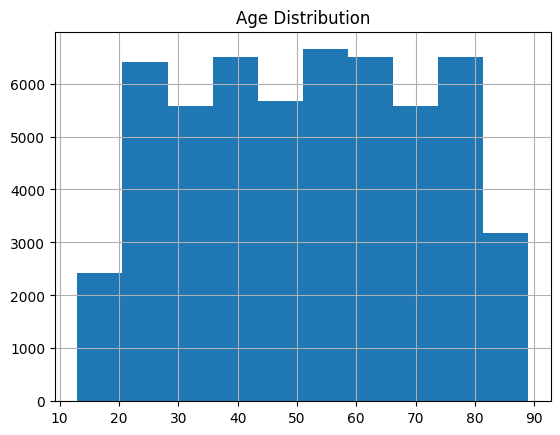

In [94]:
# Age
df2['Age'].hist()
plt.title("Age Distribution")
plt.show()

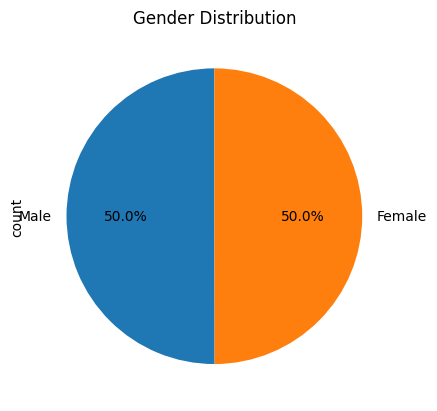

In [95]:
# Gender
df2['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

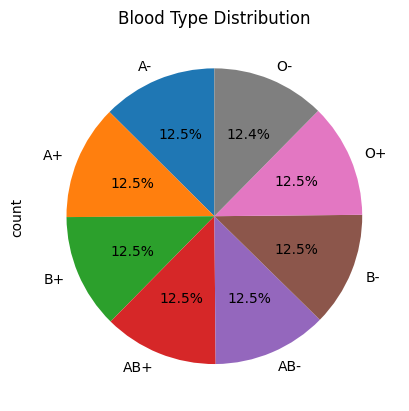

In [96]:
# Blood type
df2['Blood Type'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.title("Blood Type Distribution")
plt.show()

<ipython-input-97-0d084d777c54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Blood Rhesus'] = df2['Blood Type'].apply(lambda x: 'Yes' if x.endswith('+') else 'No')


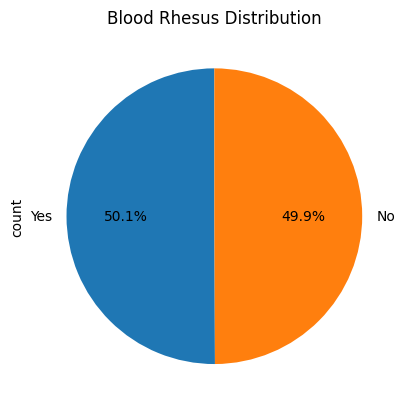

In [97]:
# Blood Type - Blood Rhesus
df2['Blood Rhesus'] = df2['Blood Type'].apply(lambda x: 'Yes' if x.endswith('+') else 'No')

df2['Blood Rhesus'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.title("Blood Rhesus Distribution")
plt.show()

<ipython-input-98-637072623a90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Blood Type excl.Rhesus'] = df2['Blood Type'].str.replace('[+-]', '', regex=True)


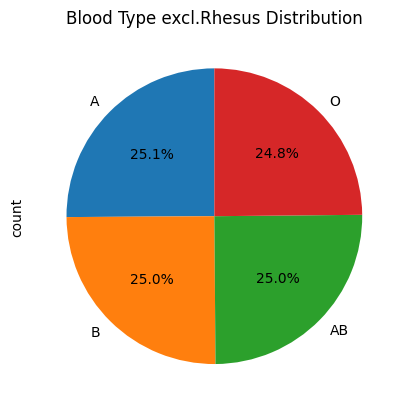

In [98]:
# Blood Type - blood type excl.Rhesus
df2['Blood Type excl.Rhesus'] = df2['Blood Type'].str.replace('[+-]', '', regex=True)

df2['Blood Type excl.Rhesus'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.title("Blood Type excl.Rhesus Distribution")
plt.show()

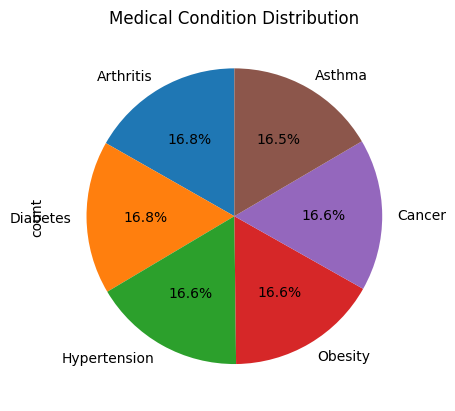

In [99]:
# Medical Condition
df2['Medical Condition'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title("Medical Condition Distribution")
plt.show()

<ipython-input-100-39477791cb1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month_of_admission'] = df2['Date of Admission'].dt.month


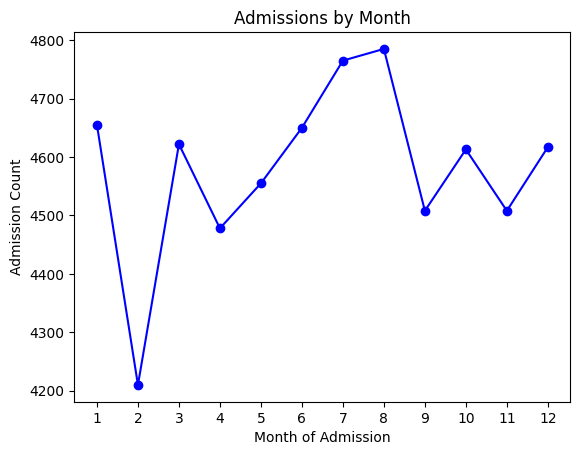

In [100]:
# Admission
df2['month_of_admission'] = df2['Date of Admission'].dt.month
monthly_counts = df2['month_of_admission'].value_counts().sort_index()

x = monthly_counts.index
y = monthly_counts.values

plt.plot(x, y, marker='o', linestyle='-', color='blue')
plt.xticks(range(1, 13))
plt.xlabel('Month of Admission')
plt.ylabel('Admission Count')
plt.title('Admissions by Month')
plt.show()

Summary

* Patient Age Range

Patients age ranged from 13 to 89 years, with and average of 52 years.

*  Gender

Patients' gender are equally divided with male patients slightly more by a percentage of 2%.

* Blood Type

A- is the blood type most prevalent but the distribution of blood type among patients are nearly evenly distributed.


*  Medical Condition

There are 6 types of Medical conditions,'Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension' and 'Arthritis'. Arthritis has the highest frequency,with 17% abundance.

*  Temporal coverage

From date of admission, the data span from patients admitted from 9 May 2019 to 7 May 2024.

*  Hospitalization Time

With regards to hospipitalization time of patitents, the day range from 1 day to 30 days, with an average and median of 15 days.

*  Admission

Admission trend is observed from the dataset, starting from april, the admissions rised and reach highest admissions in August.

*  Hospitals and Doctors

There are 39,876 unique hospitals and 40,431 doctors included in the dataset


*  Test Results

There are 3 types of test results, 'Normal","Inconclusive" and " Abnormal". in the dataset, "Abnormal" has the highest frequency, with 18437 appearance over 54966 patients, which is of 34% abundance.





# 4. Machine Learning - Naives Bayes

In [101]:
# Import the packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [106]:
# Transform categorical data to int.
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

In [110]:
# confirm transformed dtype
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  int64  
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  int64  
 3   Blood Type          55500 non-null  int64  
 4   Medical Condition   55500 non-null  int64  
 5   Date of Admission   55500 non-null  int64  
 6   Doctor              55500 non-null  int64  
 7   Hospital            55500 non-null  int64  
 8   Insurance Provider  55500 non-null  int64  
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  int64  
 12  Discharge Date      55500 non-null  int64  
 13  Medication          55500 non-null  int64  
 14  Test Results        55500 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 6.4 MB


In [107]:
# Split data
X = df.drop(columns=['Test Results','Name','Room Number'])
y = df['Test Results']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [111]:
#Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [113]:
# Prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [79]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3332432432432432

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.41      0.37      3721
           1       0.32      0.24      0.27      3706
           2       0.34      0.35      0.34      3673

    accuracy                           0.33     11100
   macro avg       0.33      0.33      0.33     11100
weighted avg       0.33      0.33      0.33     11100

